<img src="https://i.esdrop.com/d/7o0dj05m8rnz/JNGCMedl18.png" width="45%">

# 분류 - 직원 이직률

직원 이직률 데이터 활용
- Employee Turnover
- 출처 : [Kaggle - Employee Turnover](https://www.kaggle.com/datasets/davinwijaya/employee-turnover)
- 총 16개 컬럼 중 Target 컬럼은 `event`

---

# Import Libraries & Load data

In [1]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Visual Python: Data Analysis > File
df = pd.read_csv('./data/Employee_Turnover.csv')
df

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,10.611910,0,f,41.0,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1125,10.611910,0,f,41.0,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1126,118.800821,0,f,34.0,Telecom,Accounting,KA,no,f,white,bus,4.6,5.5,7.2,6.3,3.7
1127,49.412731,0,f,51.0,Consult,HR,empjs,no,m,grey,bus,3.8,7.6,5.7,6.3,5.2


# EDA & Data Preprocessing

#### Q. 데이터의 상위 5개 행을 출력하세요.

In [3]:
# Visual Python: Data Analysis > Data Info
df.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


#### Q. 각 컬럼별 데이터 타입과 데이터 개수를 확인하세요.

In [4]:
# Visual Python: Data Analysis > Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 141.2+ KB


In [5]:
# 타겟 컬럼
col_target = 'event'
# 수치형 컬럼
col_num = ['stag', 'age', 'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator']

#### Q. 각 컬럼의 결측치 수를 확인하세요.

In [6]:
# Visual Python: Data Analysis > Data Info
pd.DataFrame({'Null Count': df.isnull().sum(), 'Non-Null Count': df.notnull().sum()})

,Null Count,Non-Null Count
stag,0,1129
event,0,1129
gender,0,1129
age,0,1129
industry,0,1129
profession,0,1129
traffic,0,1129
coach,0,1129
head_gender,0,1129
greywage,0,1129


#### Q. 수치형 컬럼들의 통계값을 출력하세요.
- 수치형 컬럼: `stag`, `age`, `extraversion`, `independ`, `selfcontrol`, `anxiety`, `novator`

In [7]:
# Visual Python: Data Analysis > Data Info
df.describe()

,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000
mean,36.627526,0.505757,31.066965,5.592383,5.478034,5.597254,5.665633,5.879628
std,34.096597,0.500188,6.996147,1.851637,1.703312,1.980101,1.709176,1.904016
min,0.394251,0.000000,18.000000,1.000000,1.000000,1.000000,1.700000,1.000000
25%,11.728953,0.000000,26.000000,4.600000,4.100000,4.100000,4.800000,4.400000
50%,24.344969,1.000000,30.000000,5.400000,5.500000,5.700000,5.600000,6.000000
75%,51.318275,1.000000,36.000000,7.000000,6.900000,7.200000,7.100000,7.500000
max,179.449692,1.000000,58.000000,10.000000,10.000000,10.000000,10.000000,10.000000


#### Q. 수치형 컬럼간 상관계수를 확인하시오.

In [8]:
# Visual Python: Data Analysis > Data Info
df.corr(numeric_only=True)

,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator
stag,1.000000,-0.048361,-0.197381,-0.088227,0.000550,0.077076,0.014755,-0.037633
event,-0.048361,1.000000,-0.048751,0.015458,0.051864,-0.040040,-0.063232,0.006825
age,-0.197381,-0.048751,1.000000,-0.149753,0.056129,0.038996,0.057782,0.039509
extraversion,-0.088227,0.015458,-0.149753,1.000000,-0.200052,-0.538039,-0.135046,0.297375
independ,0.000550,0.051864,0.056129,-0.200052,1.000000,-0.165795,-0.427209,0.023865
selfcontrol,0.077076,-0.040040,0.038996,-0.538039,-0.165795,1.000000,-0.107568,-0.565972
anxiety,0.014755,-0.063232,0.057782,-0.135046,-0.427209,-0.107568,1.000000,0.246668
novator,-0.037633,0.006825,0.039509,0.297375,0.023865,-0.565972,0.246668,1.000000


#### Q. 히스토그램을 이용해 수치형 컬럼들의 데이터 분포를 확인하시오.

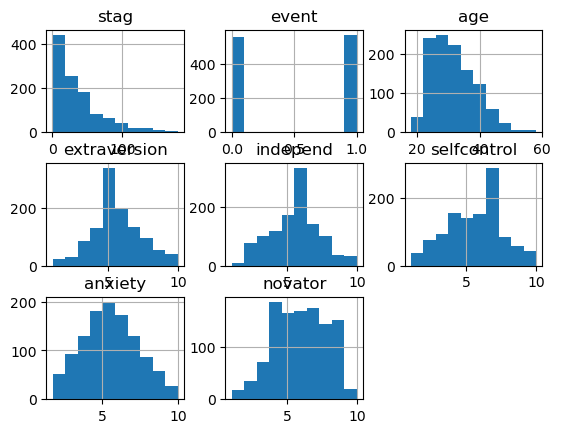

In [9]:
# Visual Python: Data Analysis > Data Info
df.hist()
plt.show()

#### Q. 박스플롯을 이용해 수치형 컬럼들의 분포와 이상치를 확인하세요.

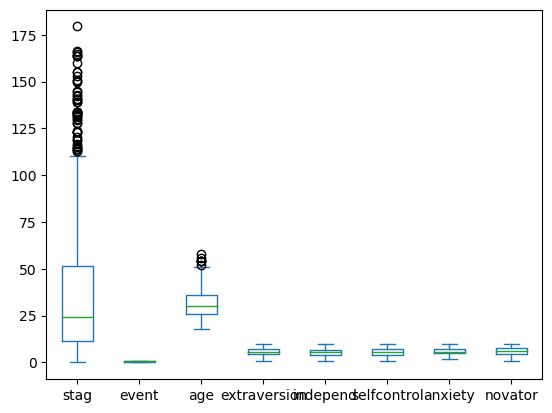

In [10]:
# Visual Python: Data Analysis > Data Info
df.plot(kind='box')
plt.show()

#### Q. 직원의 이직 여부(`event`)의 비율을 countplot으로 그려보세요.

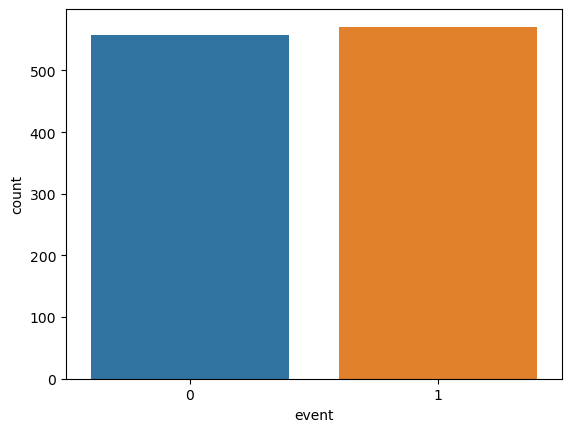

In [11]:
# Visual Python: Visualization > Seaborn
sns.countplot(data=df, x='event')
plt.show()

#### Q. 직원의 이직 여부(event)를 범주로 `gender`와 `way`의 countplot을 그려보세요.

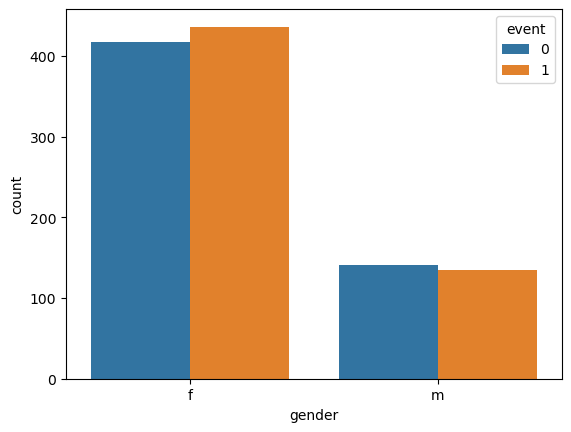

In [12]:
# Visual Python: Visualization > Seaborn
sns.countplot(data=df, x='gender', hue='event', order=df['gender'].value_counts(ascending=False).index)
plt.show()

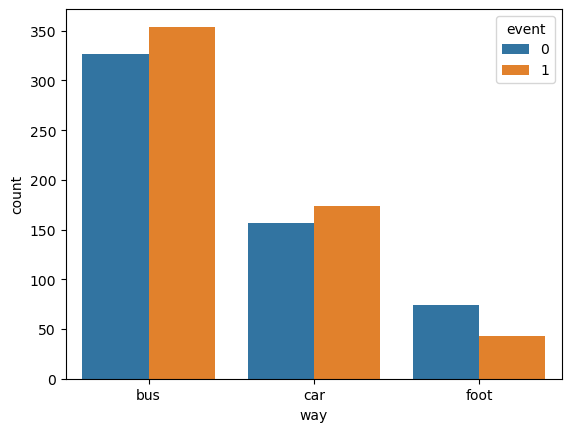

In [13]:
# Visual Python: Visualization > Seaborn
sns.countplot(data=df, x='way', hue='event')
plt.show()

#### Q. `gender`, `head_gender`,`greywage` 컬럼을 라벨 인코딩한 후 원본 컬럼은 삭제하세요.

In [14]:
# Visual Python: Data Analysis > Frame
df['gender_label'] = pd.Categorical(df['gender']).codes
df['head_gender_label'] = pd.Categorical(df['head_gender']).codes
df['greywage_label'] = pd.Categorical(df['greywage']).codes
df.drop(['gender','head_gender','greywage'], axis=1, inplace=True)
df

,stag,event,age,industry,profession,traffic,coach,way,extraversion,independ,selfcontrol,anxiety,novator,gender_label,head_gender_label,greywage_label
0,7.030801,1,35.0,Banks,HR,rabrecNErab,no,bus,6.2,4.1,5.7,7.1,8.3,1,0,1
1,22.965092,1,33.0,Banks,HR,empjs,no,bus,6.2,4.1,5.7,7.1,8.3,1,1,1
2,15.934292,1,35.0,PowerGeneration,HR,rabrecNErab,no,bus,6.2,6.2,2.6,4.8,8.3,0,1,1
3,15.934292,1,35.0,PowerGeneration,HR,rabrecNErab,no,bus,5.4,7.6,4.9,2.5,6.7,0,1,1
4,8.410678,1,32.0,Retail,Commercial,youjs,yes,bus,3.0,4.1,8.0,7.1,3.7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,10.611910,0,41.0,Banks,HR,rabrecNErab,my head,bus,8.6,3.4,2.6,4.8,8.3,0,1,1
1125,10.611910,0,41.0,Banks,HR,rabrecNErab,my head,bus,8.6,3.4,2.6,4.8,8.3,0,1,1
1126,118.800821,0,34.0,Telecom,Accounting,KA,no,bus,4.6,5.5,7.2,6.3,3.7,0,0,1
1127,49.412731,0,51.0,Consult,HR,empjs,no,bus,3.8,7.6,5.7,6.3,5.2,0,1,0


#### Q.  `industry`, `profession`, `traffic`, `coach`, `way` 컬럼을 원핫인코딩 하세요.

In [15]:
# Visual Python: Data Analysis > Frame
df = pd.get_dummies(data=df, columns=['industry','profession','traffic','coach','way'])
df

,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator,gender_label,head_gender_label,...,traffic_rabrecNErab,traffic_recNErab,traffic_referal,traffic_youjs,coach_my head,coach_no,coach_yes,way_bus,way_car,way_foot
0,7.030801,1,35.0,6.2,4.1,5.7,7.1,8.3,1,0,...,1,0,0,0,0,1,0,1,0,0
1,22.965092,1,33.0,6.2,4.1,5.7,7.1,8.3,1,1,...,0,0,0,0,0,1,0,1,0,0
2,15.934292,1,35.0,6.2,6.2,2.6,4.8,8.3,0,1,...,1,0,0,0,0,1,0,1,0,0
3,15.934292,1,35.0,5.4,7.6,4.9,2.5,6.7,0,1,...,1,0,0,0,0,1,0,1,0,0
4,8.410678,1,32.0,3.0,4.1,8.0,7.1,3.7,1,0,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,10.611910,0,41.0,8.6,3.4,2.6,4.8,8.3,0,1,...,1,0,0,0,1,0,0,1,0,0
1125,10.611910,0,41.0,8.6,3.4,2.6,4.8,8.3,0,1,...,1,0,0,0,1,0,0,1,0,0
1126,118.800821,0,34.0,4.6,5.5,7.2,6.3,3.7,0,0,...,0,0,0,0,0,1,0,1,0,0
1127,49.412731,0,51.0,3.8,7.6,5.7,6.3,5.2,0,1,...,0,0,0,0,0,1,0,1,0,0


# Support Vector Machine 모델로 분류하기

#### Q. `df`를 이용해 데이터셋을 train, test로 분리해주세요.

In [16]:
# Visual Python: Machine Learning > Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['stag', 'age', 'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator', 'gender_label', 'head_gender_label', 'greywage_label', 'industry_ HoReCa', 'industry_Agriculture', 'industry_Banks', 'industry_Building', 'industry_Consult', 'industry_IT', 'industry_Mining', 'industry_Pharma', 'industry_PowerGeneration', 'industry_RealEstate', 'industry_Retail', 'industry_State', 'industry_Telecom', 'industry_etc', 'industry_manufacture', 'industry_transport', 'profession_Accounting', 'profession_BusinessDevelopment', 'profession_Commercial', 'profession_Consult', 'profession_Engineer', 'profession_Finane', 'profession_HR', 'profession_IT', 'profession_Law', 'profession_Marketing', 'profession_PR', 'profession_Sales', 'profession_Teaching', 'profession_etc', 'profession_manage', 'traffic_KA', 'traffic_advert', 'traffic_empjs', 'traffic_friends', 'traffic_rabrecNErab', 'traffic_recNErab', 'traffic_referal', 'traffic_youjs', 'coach_my head', 'coach_no', 'coach_yes', 'way_bus', 'way_car', 'way_foot']], df['event'])

#### Q. Support Vector Machine 모델을 생성하고, fit으로 학습시킨 후 예측 결과를 `pred`에 저장하세요.

In [17]:
# Visual Python: Machine Learning > Classifier
from sklearn.svm import SVC

model_svc = SVC()

In [18]:
# Visual Python: Machine Learning > Fit/Predict
model_svc.fit(X_train, y_train)

SVC()

In [19]:
# Visual Python: Machine Learning > Fit/Predict
pred = model_svc.predict(X_test)
pred

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1],
      dtype=int64)

#### Q. 예측결과인 `pred`를 평가해 정확도(accuracy)와 f1-score를 확인하세요.
- Visual Python: Machine Learning > Evaluation

In [20]:
# Visual Python: Machine Learning > Evaluation
from sklearn import metrics

In [21]:
# Visual Python: Machine Learning > Evaluation
from IPython.display import display, Markdown

In [22]:
# Visual Python: Machine Learning > Evaluation
# Confusion Matrix
display(Markdown('### Confusion Matrix'))
display(pd.crosstab(y_test, pred, margins=True))

### Confusion Matrix

col_0,0,1,All
event,,,
0,48,85,133
1,50,100,150
All,98,185,283


In [23]:
# Visual Python: Machine Learning > Evaluation
# Classification report
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.49      0.36      0.42       133
           1       0.54      0.67      0.60       150

    accuracy                           0.52       283
   macro avg       0.52      0.51      0.51       283
weighted avg       0.52      0.52      0.51       283



# RandomForestClassifier 모델로 분류하기

#### Q. `df`를 이용해 데이터셋을 train, test로 분리해주세요.

In [24]:
# Visual Python: Machine Learning > Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['stag', 'age', 'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator', 'gender_label', 'head_gender_label', 'greywage_label', 'industry_ HoReCa', 'industry_Agriculture', 'industry_Banks', 'industry_Building', 'industry_Consult', 'industry_IT', 'industry_Mining', 'industry_Pharma', 'industry_PowerGeneration', 'industry_RealEstate', 'industry_Retail', 'industry_State', 'industry_Telecom', 'industry_etc', 'industry_manufacture', 'industry_transport', 'profession_Accounting', 'profession_BusinessDevelopment', 'profession_Commercial', 'profession_Consult', 'profession_Engineer', 'profession_Finane', 'profession_HR', 'profession_IT', 'profession_Law', 'profession_Marketing', 'profession_PR', 'profession_Sales', 'profession_Teaching', 'profession_etc', 'profession_manage', 'traffic_KA', 'traffic_advert', 'traffic_empjs', 'traffic_friends', 'traffic_rabrecNErab', 'traffic_recNErab', 'traffic_referal', 'traffic_youjs', 'coach_my head', 'coach_no', 'coach_yes', 'way_bus', 'way_car', 'way_foot']], df['event'])

#### Q. RandomForestClassifier 모델을 생성하고, fit으로 학습시킨 후 예측 결과를 `pred2`에 저장하세요.

In [25]:
# Visual Python: Machine Learning > Classifier
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

In [26]:
# Visual Python: Machine Learning > Fit/Predict
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
# Visual Python: Machine Learning > Fit/Predict
pred2 = model_rf.predict(X_test)
pred2

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

#### Q. 예측결과인 `pred2`를 평가해 정확도(accuracy)와 f1-score를 확인하세요.
- Visual Python: Machine Learning > Evaluation

In [28]:
# Visual Python: Machine Learning > Evaluation
from IPython.display import display, Markdown

In [29]:
# Visual Python: Machine Learning > Evaluation
# Confusion Matrix
display(Markdown('### Confusion Matrix'))
display(pd.crosstab(y_test, pred2, margins=True))

### Confusion Matrix

col_0,0,1,All
event,,,
0,98,33,131
1,52,100,152
All,150,133,283


In [30]:
# Visual Python: Machine Learning > Evaluation
# Classification report
print(metrics.classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70       131
           1       0.75      0.66      0.70       152

    accuracy                           0.70       283
   macro avg       0.70      0.70      0.70       283
weighted avg       0.71      0.70      0.70       283



#### Q. Feature Importance를 차트로 그리세요.

In [31]:
# Visual Python: Machine Learning > Model Info
def vp_create_feature_importances(model, X_train=None, sort=False):
    if isinstance(X_train, pd.core.frame.DataFrame):
        feature_names = X_train.columns
    else:
        feature_names = [ 'X{}'.format(i) for i in range(len(model.feature_importances_)) ]
                        
    df_i = pd.DataFrame(model.feature_importances_, index=feature_names, columns=['Feature_importance'])
    df_i['Percentage'] = 100 * df_i['Feature_importance']
    if sort: df_i.sort_values(by='Feature_importance', ascending=False, inplace=True)
    df_i = df_i.round(2)
                        
    return df_i
def vp_plot_feature_importances(model, X_train=None, sort=False, top_count=0):
    df_i = vp_create_feature_importances(model, X_train, sort)
                        
    if sort: 
        if top_count > 0:
            df_i['Percentage'].sort_values().tail(top_count).plot(kind='barh')
        else:
            df_i['Percentage'].sort_values().plot(kind='barh')
    else: 
        df_i['Percentage'].plot(kind='barh')
    plt.xlabel('Feature importance Percentage')
    plt.ylabel('Features')
                        
    plt.show()

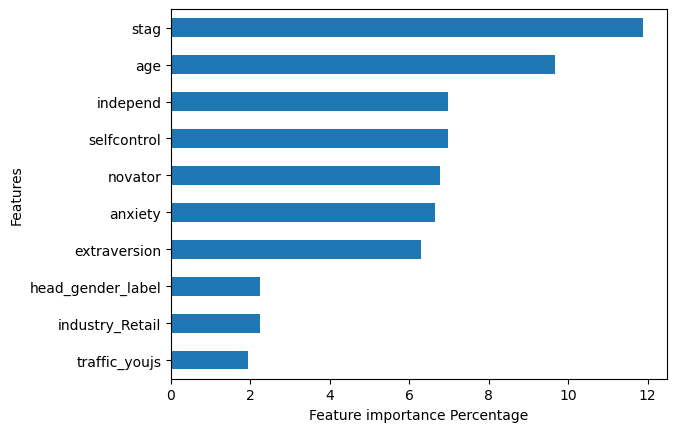

In [32]:
# Visual Python: Machine Learning > Model Info
vp_plot_feature_importances(model_rf, X_train, sort=True, top_count=10)

---

In [33]:
# End of file